# How to ...

## ... clip data to the extent of a vector file?

The utility function `mask_from_vec` can be used to create a boolean mask from a vector 
file, which can then be applied to an `xarray.DataArray` or `xarray.Dataset` object.

In the following example, we load Sentinel-2 L2A data using a vector file that contains 
a multipolygon. When we plot a single time step, we notice that the data is by default 
loaded for the bounding box of the vector file and not the multipolygon itself:

In [1]:
import sdc.utils as utils
from sdc.load import load_product

vec = '../../_assets/vec_02_00_01.geojson'
ds = load_product(product='s2_l2a', vec=vec, time_range=("2018-01-01", "2022-12-01"))

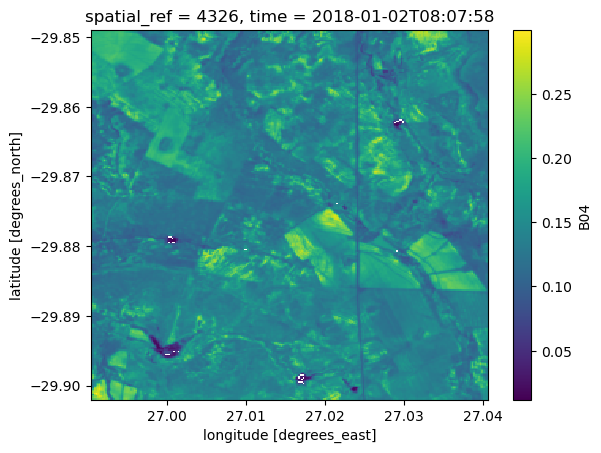

In [3]:
ds.B04.isel(time=0).plot()

Before using the `mask_from_vec`-function, let's first have a look at its docstring to 
understand what it does and what it needs as input. We can do this by typing a question 
mark followed by the function name:

In [2]:
utils.mask_from_vec?

Signature:
utils.mask_from_vec(
    vec: str,
    da: Optional[xarray.core.dataarray.DataArray] = None,
) -> xarray.core.dataarray.DataArray
Docstring:
Create a boolean mask from a vector file. The mask will have the same shape and
transform as the provided DataArray. If no DataArray is given, the `sanlc` product 
will be loaded with the bounding box of the vector file and used as the template.

Parameters
----------
vec : str
    Path to a vector file readable by geopandas (e.g. shapefile, GeoJSON, etc.).
da : DataArray, optional
    DataArray to use as a template for the mask, which will be created with the same
    shape and transform as the DataArray. If None (default), the `sanlc` product
    will be loaded with the bounding box of the vector file and used as the
    template.

Returns
-------
mask : ndarray
    The output mask as a boolean NumPy array.

Examples
--------
>>> import sdc.utils as utils
>>> from sdc.load import load_product

>>> vec = 'path/to/vector/file.geojson'
>

It only requires a vector file (the one we have already used for loading) and optionally
a reference `DataArray` to determine the shape and transform of the output mask. We can
just use any band of the dataset we want to apply the boolean mask to.

In [4]:
mask = utils.mask_from_multipolygon(vec=vec, da=ds.B04)
ds_masked = ds.where(mask)

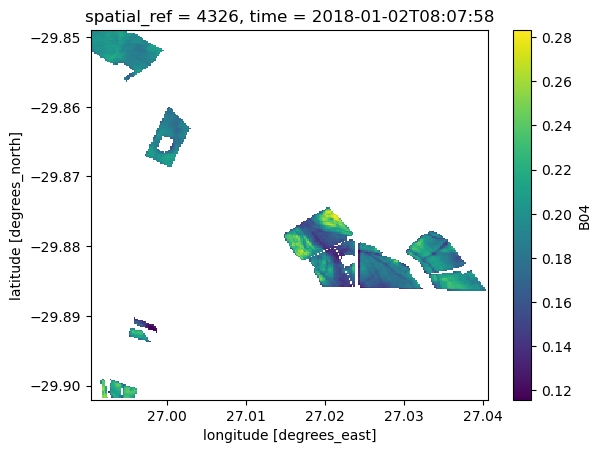

In [5]:
ds_masked.B04.isel(time=0).plot()

## ... calculate indices using the `spyndex` package?

_Coming soon..._

![https://media.giphy.com/media/26vUKLfpzAS2QIVVK/giphy.gif](https://media.giphy.com/media/26vUKLfpzAS2QIVVK/giphy.gif)